In [1]:
import mysql.connector
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="tess"
)

df = pd.read_sql("SELECT * FROM fact_sales LIMIT 5", conn)
df


C:\Users\Rifat\AppData\Local\Temp\ipykernel_16304\1083748891.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM fact_sales LIMIT 5", conn)


,SalesID,DateID,ProductID,RetailerID,LocationID,SalesMethodID,UnitsSold,PricePerUnit,TotalSales,OperatingProfit,OperatingMargin
0,1,6,3,1185732,22,1,1,5000.0,600.0,300.00,0.50
1,2,12,2,1185732,22,1,1,5000.0,500.0,150.00,0.30
2,3,18,6,1185732,22,1,1,4000.0,400.0,140.00,0.35
3,4,24,5,1185732,22,1,850,4500.0,382.5,133.88,0.35
4,5,30,1,1185732,22,1,900,6000.0,540.0,162.00,0.30


In [3]:
query = """
SELECT
    p.ProductName,
    d.Year,
    SUM(f.TotalSales) AS TotalSales,
    SUM(f.UnitsSold) AS UnitsSold
FROM fact_sales f
JOIN dim_product p ON f.ProductID = p.ProductID
JOIN dim_date d ON f.DateID = d.DateID
GROUP BY p.ProductName, d.Year
"""

df_product = pd.read_sql(query, conn)
df_product.head()


C:\Users\Rifat\AppData\Local\Temp\ipykernel_16304\4006278957.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_product = pd.read_sql(query, conn)


,ProductName,Year,TotalSales,UnitsSold
0,Men's Apparel,2020,28544.69,61227.0
1,Men's Apparel,2021,109053.45,245456.0
2,Men's Athletic Footwear,2020,31794.53,75716.0
3,Men's Athletic Footwear,2021,128895.55,353766.0
4,Men's Street Footwear,2020,37823.06,74003.0


In [4]:
df_2021 = df_product[df_product["Year"] == 2021]
df_2021.head()


,ProductName,Year,TotalSales,UnitsSold
1,Men's Apparel,2021,109053.45,245456.0
3,Men's Athletic Footwear,2021,128895.55,353766.0
5,Men's Street Footwear,2021,171003.63,481456.0
7,Women's Apparel,2021,145708.84,353619.0
9,Women's Athletic Footwear,2021,141350.98,253059.0


In [5]:
X = df_2021[["TotalSales", "UnitsSold"]]


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


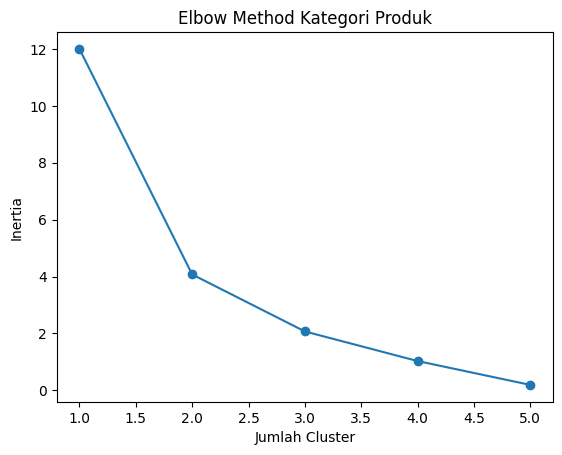

In [7]:
inertia = []

for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 6), inertia, marker='o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method Kategori Produk")
plt.show()


In [8]:
top_product = df_2021.sort_values(
    by="TotalSales",
    ascending=False
).head(1)

top_product


,ProductName,Year,TotalSales,UnitsSold
5,Men's Street Footwear,2021,171003.63,481456.0


In [9]:
actual = top_product["TotalSales"].values[0]
target = actual * 1.05
product_name = top_product["ProductName"].values[0]


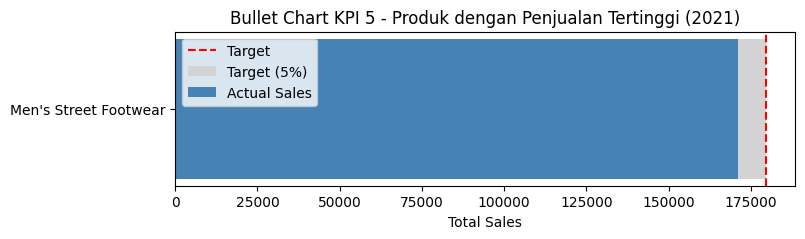

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))

# Background bar (target)
plt.barh(
    y=product_name,
    width=target,
    color='lightgray',
    label='Target (5%)'
)

# Actual sales
plt.barh(
    y=product_name,
    width=actual,
    color='steelblue',
    label='Actual Sales'
)

# Target line
plt.axvline(
    target,
    color='red',
    linestyle='--',
    label='Target'
)

plt.xlabel("Total Sales")
plt.title("Bullet Chart KPI 5 - Produk dengan Penjualan Tertinggi (2021)")
plt.legend()
plt.show()
